<a href="https://colab.research.google.com/github/areej90/SDAIA-Projects/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('/content/Task_2_Dataset.csv')

In [3]:
df.shape

(66639, 9)

In [4]:
df.isna().sum()

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop(['TravelTimeHistoric' , 'TravelTimeLive' , 'TrafficIndexWeekAgo'] , axis=1)

In [7]:
df.dropna()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5
...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3


In [8]:
df.shape

(66639, 6)

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [9]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength
count,66639.000000,66639.000000,66639.000000,66639.000000
mean,14.043113,74.278531,288.353877,49.316135
std,13.488906,107.452022,470.013224,85.352525
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,27.700000,3.000000
50%,10.000000,29.000000,95.700000,12.200000
75%,21.000000,95.000000,336.600000,53.500000
max,138.000000,1359.000000,9989.400000,1173.900000


### Identify and analyze patterns in the data.

In [10]:
# Calculate average JamsCount and JamsDelay for each city
avg_jams = df.groupby('City')[['JamsCount', 'JamsDelay']].mean().sort_values(by='JamsCount', ascending=False)
avg_jams

,JamsCount,JamsDelay
City,,
Dubai,185.216341,717.264856
Riyadh,145.902324,620.349390
Kuwait,68.176619,247.578610
Cairo,65.302186,269.112911
Jeddah,48.843944,182.129322
Doha,41.909457,127.612057
Dammam,33.675983,123.072516
Abudhabi,29.870859,107.800285
Mecca,11.925207,42.870885


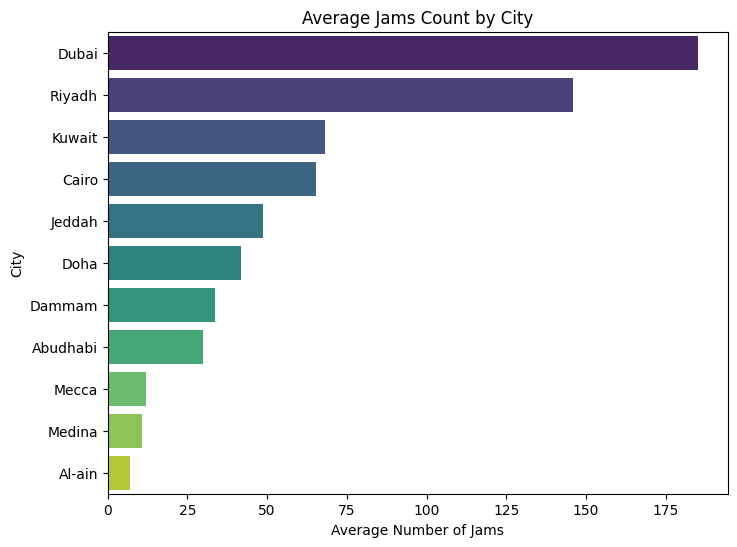

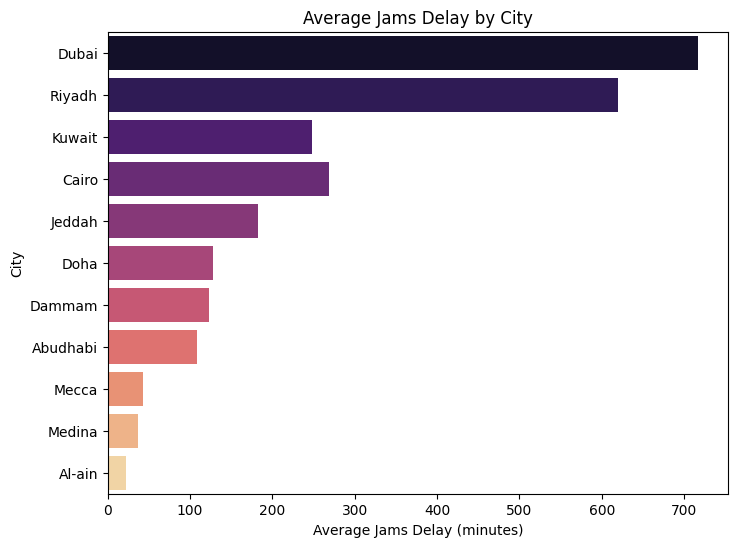

In [17]:
# Plot the bar chart for JamsCount
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_jams['JamsCount'], y=avg_jams.index,hue=avg_jams.index , palette='viridis')
plt.title('Average Jams Count by City')
plt.xlabel('Average Number of Jams')
plt.ylabel('City')
plt.show()

# Plot the bar chart for JamsDelay
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_jams['JamsDelay'], y=avg_jams.index, hue=avg_jams.index,  palette='magma')
plt.title('Average Jams Delay by City')
plt.xlabel('Average Jams Delay (minutes)')
plt.ylabel('City')
plt.show()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

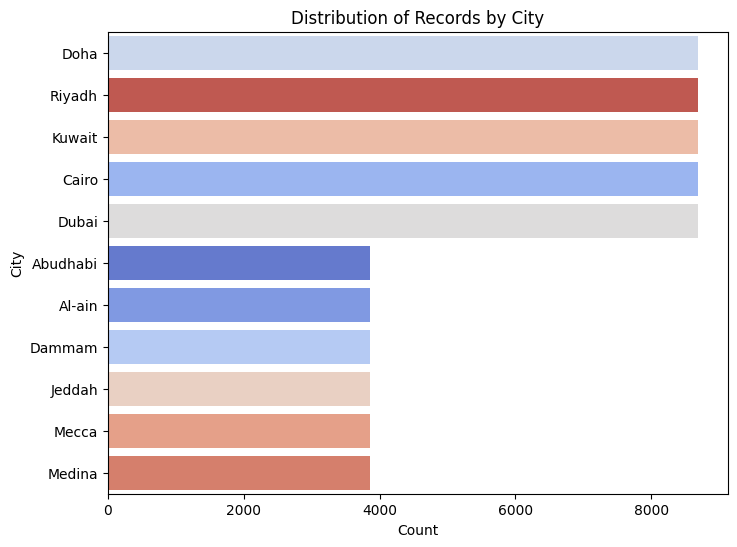

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index , hue='City',palette='coolwarm')

plt.title('Distribution of Records by City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

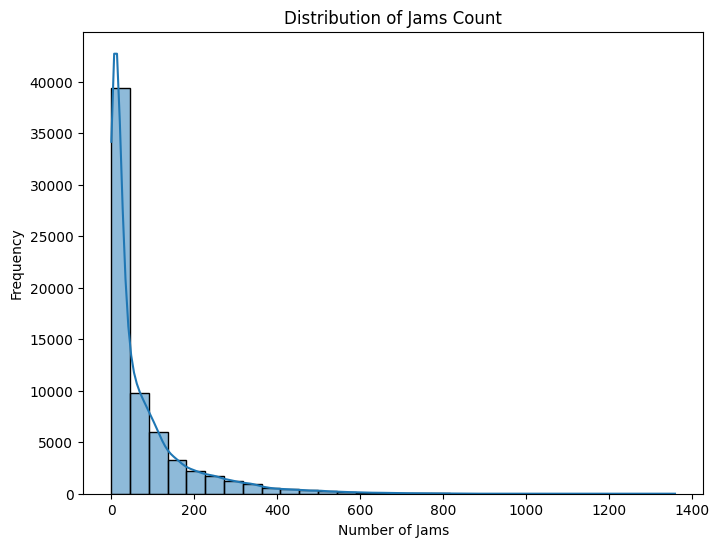

In [19]:
# Plot the distribution of JamsCount
plt.figure(figsize=(8, 6))
sns.histplot(df['JamsCount'], kde=True, bins=30)
plt.title('Distribution of Jams Count')
plt.xlabel('Number of Jams')
plt.ylabel('Frequency')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


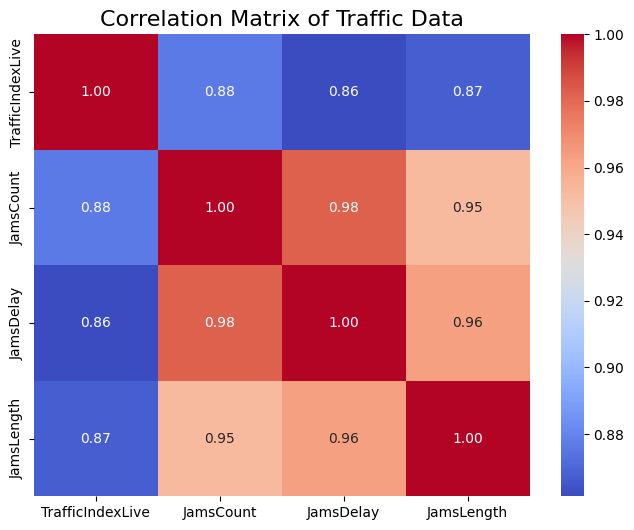

In [20]:
numeric_data = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Traffic Data', fontsize=16)
plt.show()

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


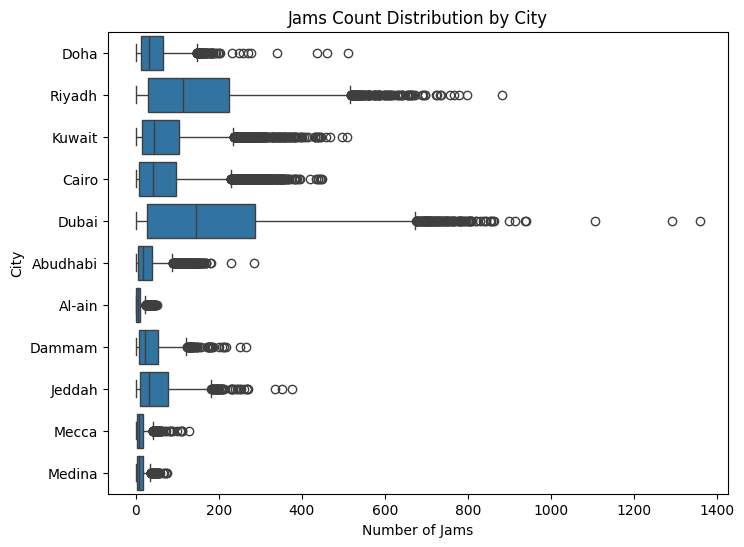

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='JamsCount', y='City', data=df, order=df['City'].value_counts().index)
plt.title('Jams Count Distribution by City')
plt.xlabel('Number of Jams')
plt.ylabel('City')
plt.show()

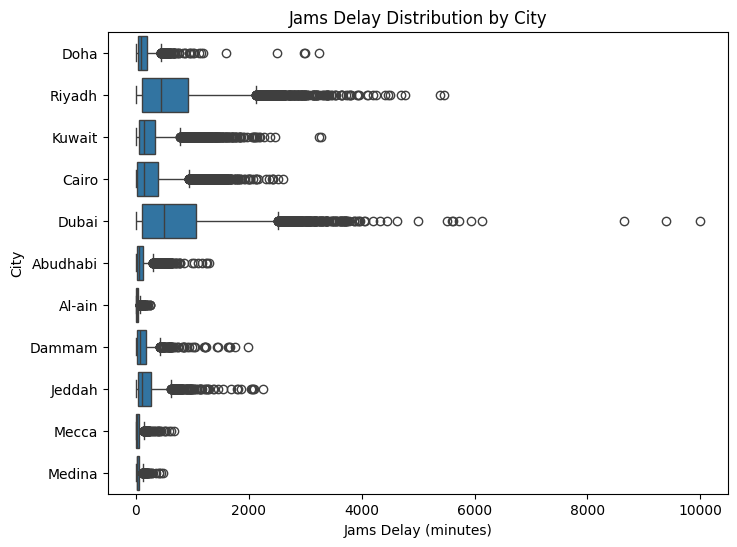

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='JamsDelay', y='City', data=df, order=df['City'].value_counts().index)
plt.title('Jams Delay Distribution by City')
plt.xlabel('Jams Delay (minutes)')
plt.ylabel('City')
plt.show()


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

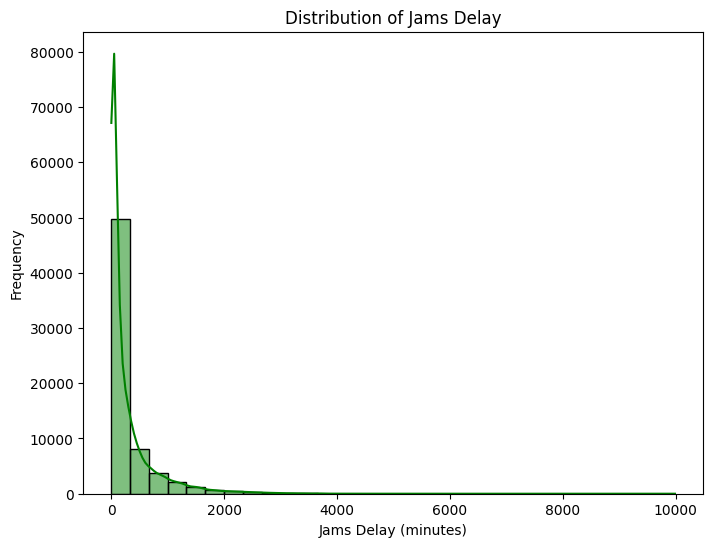

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['JamsDelay'], bins=30, kde=True, color='green')
plt.title('Distribution of Jams Delay')
plt.xlabel('Jams Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
High JamsCount Cities:  cities have the highest average number of traffic jams and delays. such as (Dubai)
Low JamsCount Cities:  cities with the lowest average number of traffic jams and delays. such as (Al-ain)
Correlation:  there's a strong correlation between the number of jams and the delay.